In [1]:
# ====Importe de librerías
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import cm, colors
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.stats import norm
import plotly.graph_objects as go
from IPython.display import display
import mplcursors
import sys
import ipympl
import plotly.express as px
import json
import plotly.graph_objects as go

#Muestra de todas las columnas y 100 filas al imprimir DataFrame
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas al imprimir DataFrame
pd.set_option('display.max_rows', 100)      # Mostrar hasta 100 filas al imprimir DataFrame

In [2]:
# =====Extracción de datos desde un archivo CSV
# Definición de la ruta del archivo CSV
data_inicial = (r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/Colombianos_registrados_en_el_exterior_20250917.csv")
print(data_inicial)
print("Ruta del archivo CSV:", data_inicial)

C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/Colombianos_registrados_en_el_exterior_20250917.csv
Ruta del archivo CSV: C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/Colombianos_registrados_en_el_exterior_20250917.csv


In [3]:
# =======Lectura del archivo CSV utilizando pandas
# Lectura del archivo CSV utilizando pandas
data_analisis = pd.read_csv(data_inicial,sep=";", encoding="ISO-8859-1", low_memory=False)
# Visualización de las primeras filas del DataFrame
print(data_analisis.head(10))

             Pais Codigo ISO pais Departamento/Estado Ciudad_Migrada  \
0  ESTADOS UNIDOS             USA          WASHINGTON        SEATTLE   
1  ESTADOS UNIDOS             USA               TEXAS       PASADENA   
2  ESTADOS UNIDOS             USA            NEW YORK     NUEVA YORK   
3          CANADA             CAN             ALBERTA        CALGARY   
4  ESTADOS UNIDOS             USA             FLORIDA     BAY HARBOR   
5  ESTADOS UNIDOS             USA             FLORIDA          TAMPA   
6  ESTADOS UNIDOS             USA          CALIFORNIA   LAGUNA HILLS   
7  ESTADOS UNIDOS             USA             FLORIDA       LONGWOOD   
8  ESTADOS UNIDOS             USA               TEXAS     SUGAR LAND   
9  ESTADOS UNIDOS             USA            NEW YORK   NEW ROCHELLE   

  Oficina de registro    Grupo edad  Edades  \
0    C. SAN FRANCISCO        ADULTO      32   
1          C. HOUSTON        ADULTO      52   
2       C. NUEVA YORK        ADULTO      33   
3          C. CALGA

In [4]:
#========Información general del DataFrame
df_titulos= data_analisis.info()
print(df_titulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601524 entries, 0 to 601523
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Pais                   601524 non-null  object
 1   Codigo ISO pais        601524 non-null  object
 2   Departamento/Estado    601524 non-null  object
 3   Ciudad_Migrada         601524 non-null  object
 4   Oficina de registro    601524 non-null  object
 5   Grupo edad             601524 non-null  object
 6   Edades                 601524 non-null  int64 
 7   Area Conocimiento      601524 non-null  object
 8   Sub Area Conocimiento  601524 non-null  object
 9   Nivel Academico        601524 non-null  object
 10  Estado civil           601524 non-null  object
 11  Genero                 601524 non-null  object
 12  Etnia de la persona    601524 non-null  object
 13  Estatura CM            601524 non-null  int64 
 14  Pais de Nacimiento     601524 non-null  object
 15  

In [5]:
# =====Copia del DataFrame para análisis y transformación
# Copia para trabajar sin modificar el original
data_analisis_copia = data_analisis.copy()
print(data_analisis_copia.head(20))

              Pais Codigo ISO pais Departamento/Estado   Ciudad_Migrada  \
0   ESTADOS UNIDOS             USA          WASHINGTON          SEATTLE   
1   ESTADOS UNIDOS             USA               TEXAS         PASADENA   
2   ESTADOS UNIDOS             USA            NEW YORK       NUEVA YORK   
3           CANADA             CAN             ALBERTA          CALGARY   
4   ESTADOS UNIDOS             USA             FLORIDA       BAY HARBOR   
5   ESTADOS UNIDOS             USA             FLORIDA            TAMPA   
6   ESTADOS UNIDOS             USA          CALIFORNIA     LAGUNA HILLS   
7   ESTADOS UNIDOS             USA             FLORIDA         LONGWOOD   
8   ESTADOS UNIDOS             USA               TEXAS       SUGAR LAND   
9   ESTADOS UNIDOS             USA            NEW YORK     NEW ROCHELLE   
10  ESTADOS UNIDOS             USA             INDIANA         COLUMBUS   
11  ESTADOS UNIDOS             USA            NEW YORK  MASSAPEQUA PARK   
12  ESTADOS UNIDOS       

In [6]:
#=========Filtro de Año, Pais, Edades y conversión de Fechas 
#Formato de fechas en dataframe inicial es %Y-%m-%d
data_analisis_copia['Fecha de Registro'] = pd.to_datetime(data_analisis_copia['Fecha de Registro'], format='%Y-%m', errors='coerce')
data_analisis_copia['Mes_Año'] = data_analisis_copia['Fecha de Registro'].dt.strftime('%m-%Y')
data_analisis_copia['Año'] = data_analisis_copia['Fecha de Registro'].dt.year
print(data_analisis_copia.head(10))

#Filtro de datos
filtro = (
    (data_analisis_copia['Año'] >= 2021) & (data_analisis_copia['Año'] <= 2024) &
    (data_analisis_copia['Pais de Nacimiento'] == 'COLOMBIA') &
    (data_analisis_copia['Edades'] >= 18) & (data_analisis_copia['Edades'] <= 70)
)
data_analisis_copia = data_analisis_copia[filtro]

#Visualización primeras 1000 filas del dataframe copia
print(data_analisis_copia.head(1000))

             Pais Codigo ISO pais Departamento/Estado Ciudad_Migrada  \
0  ESTADOS UNIDOS             USA          WASHINGTON        SEATTLE   
1  ESTADOS UNIDOS             USA               TEXAS       PASADENA   
2  ESTADOS UNIDOS             USA            NEW YORK     NUEVA YORK   
3          CANADA             CAN             ALBERTA        CALGARY   
4  ESTADOS UNIDOS             USA             FLORIDA     BAY HARBOR   
5  ESTADOS UNIDOS             USA             FLORIDA          TAMPA   
6  ESTADOS UNIDOS             USA          CALIFORNIA   LAGUNA HILLS   
7  ESTADOS UNIDOS             USA             FLORIDA       LONGWOOD   
8  ESTADOS UNIDOS             USA               TEXAS     SUGAR LAND   
9  ESTADOS UNIDOS             USA            NEW YORK   NEW ROCHELLE   

  Oficina de registro    Grupo edad  Edades  \
0    C. SAN FRANCISCO        ADULTO      32   
1          C. HOUSTON        ADULTO      52   
2       C. NUEVA YORK        ADULTO      33   
3          C. CALGA

In [7]:
# ==========Creacion de df con los datos filtrados
# Exporte del DataFrame filtrado a un archivo CSV
data_analisis_copia_to_excel = data_analisis_copia.to_excel(r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/Dataframe_Fracmentados_filtrados/data_analisis_copia.xlsx", index=False, engine='openpyxl')
print("Filas:", data_analisis_copia.shape[0])
print("Columnas:", data_analisis_copia.shape[1])
print("Total de datos (celdas):", data_analisis_copia.size)

Filas: 233736
Columnas: 27
Total de datos (celdas): 6310872


,Año,Conteo,Porcentaje (%)
0,2021,37816,16.18%
1,2022,63673,27.24%
2,2023,71338,30.52%
3,2024,60909,26.06%


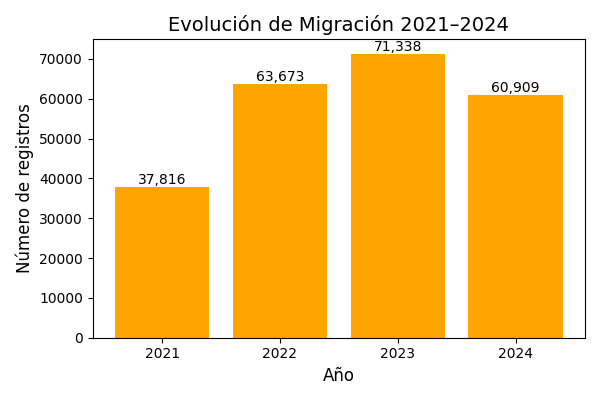

,Grupo edad,Conteo,Porcentaje (%)
0,ADULTO,166538,71.25%
1,ADULTO JOVEN,39069,16.72%
2,ADULTO MAYOR,28129,12.03%


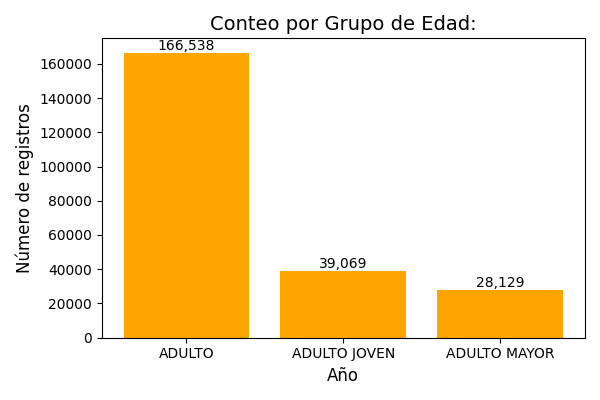

In [9]:
# =========Conteo de datos por años y por país de origen.
#Conteo de datos por años y Porcentajees (porcentajes) de cada año
conteo_año = data_analisis_copia['Año'].value_counts().sort_index()
Porcentajees = data_analisis_copia['Año'].value_counts(normalize=True).sort_index()
# Unión de un DataFrame y  Filtrar solo años 2021 a 2024
resumen = pd.DataFrame({'Conteo': conteo_año,'Porcentaje (%)': (Porcentajees * 100).round(2)})
resumen_año = resumen.loc[2021:2024].reset_index() # Seleccionar solo años 2021 a 2024
conteo_total_año= (data_analisis_copia['Año'] >= 2021) & (data_analisis_copia['Año'] <= 2024)
# print(f'Los datos del conteo anual son:{conteo_total_año}')
# print('__________________El resumen anual es:______________________')
# print(tabulate(resumen_año.reset_index(), headers="keys", tablefmt='pretty'))

#IMPLEMENTACIÓN DE TABLA ESTRUCTURADA
# Mostrar tabla con degradado
display(resumen_año.style.format({"Porcentaje (%)": "{:.2f}%"}).background_gradient(cmap='Blues', subset=['Conteo'])
        .set_properties(**{'text-align': 'center'}) # Alineación centrada de datos
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) # Alineación centrada de encabezados
)
# Estructuración de gráficos
# Gráfico de barras para la evolución anual
plt.figure(figsize=(6,4))
bars = plt.bar(resumen_año["Año"], resumen_año["Conteo"], color="orange")
# Título y etiquetas
plt.title("Evolución de Migración 2021–2024", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de registros", fontsize=12)
plt.xticks(resumen_año["Año"])
plt.tight_layout()

# 🔹 Agregar etiquetas de valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # posición x centrada en la barra
        height,                            # posición y (arriba de la barra)
        f'{height:,}',                     # formato con separador de miles
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

#Conteo de edades por Grupo de edad
conteo_grupo_edad = data_analisis_copia['Grupo edad'].value_counts().sort_index()
Porcentajees_edad = data_analisis_copia['Grupo edad'].value_counts(normalize=True).sort_index()
resumen_edad = pd.DataFrame({'Conteo': conteo_grupo_edad,'Porcentaje (%)': (Porcentajees_edad * 100).round(2)})
resumen_edad = resumen_edad.reset_index()
# print('__________________El conteo por grupo de edad es:______________________')
# print(tabulate(resumen_edad.reset_index(), headers="keys", tablefmt='pretty')) 
# Mostrar resultados // Datos de resumen por AÑO

# Mostrar resultados // Datos de resumen por EDAD
display(resumen_edad.style.format({"Porcentaje (%)":"{:.2f}%"}).background_gradient(cmap='Blues', subset=['Conteo'])\
        .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))
# Estructuración de gráficos
# Gráfico de barras para la evolución anual
plt.figure(figsize=(6,4))
bars = plt.bar(resumen_edad["Grupo edad"], resumen_edad["Conteo"], color="orange")
# Título y etiquetas
plt.title("Conteo por Grupo de Edad:", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de registros", fontsize=12)
plt.xticks(resumen_edad["Grupo edad"])
plt.tight_layout()

# 🔹 Agregar etiquetas de valores en cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   # posición x centrada en la barra
        height,                            # posición y (arriba de la barra)
        f'{height:,}',                     # formato con separador de miles
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

In [10]:
#===========Ploteo de gráficos Edades y distribución normal
# Histograma de edades con curva normal ajustada

# 1) Campana de Gauss (Distribución normal) de EDADES
plot_edad = data_analisis_copia['Edades'].dropna()
# Calcular parámetros de la normal
mu,sigma = plot_edad.mean(), plot_edad.std()
# Crear la curva normal y Rango de valores para la curva
counts, bins = np.histogram(plot_edad, bins=100)
bin_width = bins[1] - bins[0]
x = np.linspace(plot_edad.min(), plot_edad.max(), 100)
y = norm.pdf(x, mu, sigma)* len(plot_edad)*bin_width # Revisar como se comporta la curva normal


# 3. Crear histograma interactivo con curva normal
fig = go.Figure()
# Histograma
fig.add_trace(go.Histogram(x=plot_edad,nbinsx=100,histnorm=None,name="Frecuencia",marker=dict(color="lightblue",line=dict(color="black", width=1))))
# Curva normal
fig.add_trace(go.Scatter(x=x, y=y,mode="lines",name="Campana de Gauss",line=dict(color="red", width=2)))
# Personalizar layout
fig.update_layout(title="Distribución de edades con curva normal ajustada (Interactivo)",xaxis_title="Edad",yaxis_title="Frecuencia",bargap=0.1,width=800,height=500)
# Mostrar en Jupyter
fig.show()

# Imprimir media y desviación estándar
print(f"Media de las edades: {mu:.2f}")
print(f"Desviación estándar: {sigma:.2f}")

Media de las edades: 41.16
Desviación estándar: 13.03


In [11]:
# _________________________ ESTE FRAGMENTO DE CODIGO SE UTILIZO PARA SACAR EL Listado de ciudades unicas UTILIZADO PARA HACER ETL__________________________
# ciudades_paises = data_analisis_copia[['Pais de Nacimiento','Departamento/Estado.1','Ciudad_Origen']].drop_duplicates()
# print(ciudades_paises)
# # Exporte de la lista de ciudades y países a un archivo CSV
# ciudades_paises.to_csv(r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/ciudades_paises.csv", index=False, encoding='utf-8-sig')

In [12]:
#========== Agrupación y conteo por país de nacimiento, departamento/estado y ciudad de origen
# Verificación de Países, departamentos y ciudades únicas
agrupacion = data_analisis_copia.groupby(['Pais de Nacimiento', 'Departamento/Estado.1', 'Ciudad_Origen']).size().reset_index(name='Conteo_Región')
print(tabulate(agrupacion.reset_index(), headers="keys", tablefmt='pretty'))

+------+-------+--------------------+--------------------------+---------------------------------+---------------+
|      | index | Pais de Nacimiento |  Departamento/Estado.1   |          Ciudad_Origen          | Conteo_Región |
+------+-------+--------------------+--------------------------+---------------------------------+---------------+
|  0   |   0   |      COLOMBIA      |         AMAZONAS         |          BARRANQUILLA           |       1       |
|  1   |   1   |      COLOMBIA      |         AMAZONAS         |           EL ENCANTO            |       1       |
|  2   |   2   |      COLOMBIA      |         AMAZONAS         |           LA PEDRERA            |       5       |
|  3   |   3   |      COLOMBIA      |         AMAZONAS         |             LETICIA             |      59       |
|  4   |   4   |      COLOMBIA      |         AMAZONAS         |          PUERTO NARIÑO          |       6       |
|  5   |   5   |      COLOMBIA      |         AMAZONAS         |        PUERTO S

,Pais de Nacimiento,Departamento/Estado.1,Ciudad_Origen,Conteo_Región
743,COLOMBIA,CUNDINAMARCA,BOGOTA D.C.,67127
1537,COLOMBIA,VALLE DEL CAUCA,SANTIAGO DE CALI,20947
109,COLOMBIA,ANTIOQUIA,MEDELLIN,19880
1272,COLOMBIA,SANTANDER,BUCARAMANGA,9015
217,COLOMBIA,ATLANTICO,BARRANQUILLA,8518
1241,COLOMBIA,RISARALDA,PEREIRA,5972
1441,COLOMBIA,TOLIMA,IBAGUE,3736
1145,COLOMBIA,NORTE DE SANTANDER,CUCUTA,3701
262,COLOMBIA,BOLIVAR,CARTAGENA,3649
1061,COLOMBIA,META,VILLAVICENCIO,3338


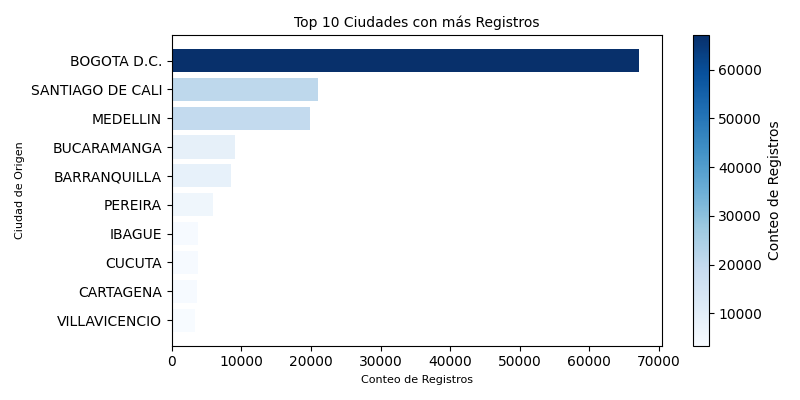

In [13]:
#==========Top 10 Ciudades con mayor cantidad de migrantes.
tablaresumen =pd.DataFrame(agrupacion)
top_10_ciudades = tablaresumen.nlargest(10,'Conteo_Región')
# Mostrar tabla con degradado de colores
display(top_10_ciudades.style.background_gradient(cmap='Blues', subset=['Conteo_Región'])\
        .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

#===========Ploteo de gráfico de barras para las 10 ciudades con más registros
#Detectar si estamos en un entorno interactivo (notebook) o directamente desde un script .py
def in_notebook():
    try:
        from IPython import get_ipython
        if 'IPKernelApp' not in get_ipython().config:  # no hay kernel de Jupyter
            return False
    except Exception:
        return False
    return True

if in_notebook():
    # Para notebooks (Jupyter/VS Code .ipynb)
    # se serciora de que el backend es 'widget'
    get_ipython().run_line_magic("matplotlib", "widget")
else:
    # Para scripts .py normales
    matplotlib.use("TkAgg")   # o "Qt5Agg" si usas Qt

#____________ Ploteo de gráfico de barras para las 10 ciudades con más registros________________________

#Gráfico de barras horizontal con degradado
fig, ax = plt.subplots(figsize=(8,4)) # Tamaño de la figura

# Normalizar valores de 'Conteo_Región' entre 0 y 1 // Conversión a escala de los valores maximos y minimos del conteo de registros
n= colors.Normalize(top_10_ciudades['Conteo_Región'].min(), top_10_ciudades['Conteo_Región'].max())

# Color variable para las barras
colores = cm.Blues(n(top_10_ciudades['Conteo_Región']))

# Graficar en el eje ax
bars = ax.barh(top_10_ciudades['Ciudad_Origen'],top_10_ciudades['Conteo_Región'],color=colores)

# Crear gráfico de barras horizontal
ax.set_title('Top 10 Ciudades con más Registros', fontsize=10)
ax.set_xlabel('Conteo de Registros', fontsize=8)
ax.set_ylabel('Ciudad de Origen', fontsize=8)
ax.invert_yaxis()  # Ciudad con más registros arriba

# Colorbar asociada al gráfico
sm = plt.cm.ScalarMappable(cmap=cm.Blues, norm=n)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Conteo de Registros')

# Activar tooltips
cursor = mplcursors.cursor(bars, hover=True)
@cursor.connect("add")
def on_add(sel):
    ciudad = top_10_ciudades['Ciudad_Origen'].iloc[sel.index]
    conteo = top_10_ciudades['Conteo_Región'].iloc[sel.index]
    sel.annotation.set_text(f"{ciudad}\nRegistros: {conteo}")
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.9)


plt.tight_layout()   # Ajusta todo automáticamente
plt.show()

,Ciudad_Origen,Area Conocimiento,Cantidad de personas
750,BOGOTA D.C.,NINGUNA,31463
5771,SANTIAGO DE CALI,NINGUNA,11086
745,BOGOTA D.C.,"ECONOMIA, ADMINISTRACION CONTADURIA Y AFINES",11008
3608,MEDELLIN,NINGUNA,10636
747,BOGOTA D.C.,"INGENIERIA, ARQUITECTURA Y AFINES",8123
742,BOGOTA D.C.,CIENCIAS SOCIALES Y HUMANAS,4979
821,BUCARAMANGA,NINGUNA,4065
740,BOGOTA D.C.,CIENCIAS DE LA SALUD,4010
626,BARRANQUILLA,NINGUNA,4005
4329,PEREIRA,NINGUNA,3650


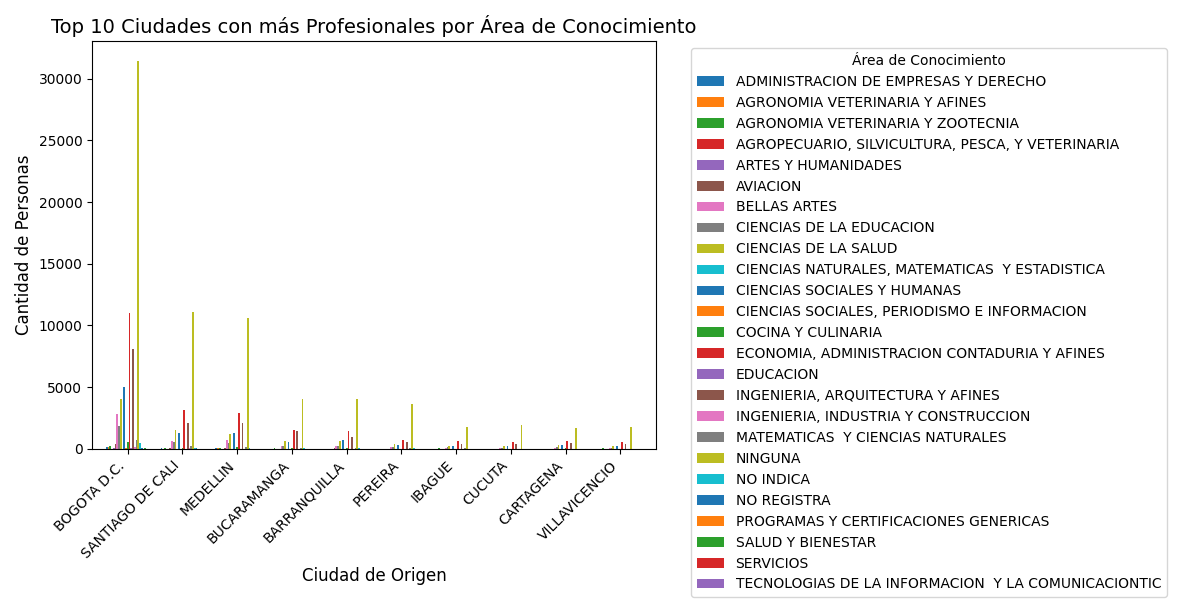

In [14]:
#==========PROFESONALES REGISTRADOS EN CIUDADES

# Agrupación y conteo por ciudad de origen y área de conocimiento
tabla_areaconocimiento = data_analisis_copia.groupby(["Ciudad_Origen","Area Conocimiento"]).agg({'Cantidad de personas':'sum'}).reset_index()
top_20_areavsciudad =(tabla_areaconocimiento.sort_values('Cantidad de personas',ascending=False).head(20))

#Mostrar tabla con degradado de colores
display(top_20_areavsciudad.style.background_gradient(cmap='Blues', subset=['Cantidad de personas'])\
        .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

# Ploteo de gráfico de barras para las 10 Primeras ciudades con más profesionales registrados
top_cities = (tabla_areaconocimiento.groupby('Ciudad_Origen')['Cantidad de personas'].sum().nlargest(10).index)

df_top_cities = tabla_areaconocimiento[tabla_areaconocimiento['Ciudad_Origen'].isin(top_cities)]

# 3) Pivot: ciudades vs áreas
pivot = (df_top_cities.pivot_table(index="Ciudad_Origen",columns="Area Conocimiento",values="Cantidad de personas",aggfunc="sum",fill_value=0).loc[top_cities])

# 4) Gráfico de barras agrupadas
ax = pivot.plot(kind="bar", figsize=(12,6), width=0.8)

plt.title("Top 10 Ciudades con más Profesionales por Área de Conocimiento", fontsize=14)
plt.xlabel("Ciudad de Origen", fontsize=12)
plt.ylabel("Cantidad de Personas", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Área de Conocimiento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# 5) Cursor para tooltips e interacción con el gráfico
cursor = mplcursors.cursor(ax.containers, hover=True)

@cursor.connect("add")
def on_add(sel):
    # índice de la barra
    ciudad_idx = sel.index  
    # nombre de la ciudad
    ciudad = pivot.index[ciudad_idx]
    # columna (área de conocimiento) de esa barra
    barra = sel.artist
    area = barra.get_label()
    # valor de la barra
    valor = barra.datavalues[ciudad_idx]
    # texto del tooltip
    sel.annotation.set_text(f"{ciudad}\n{area}: {valor:,}")
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.9)

plt.show()

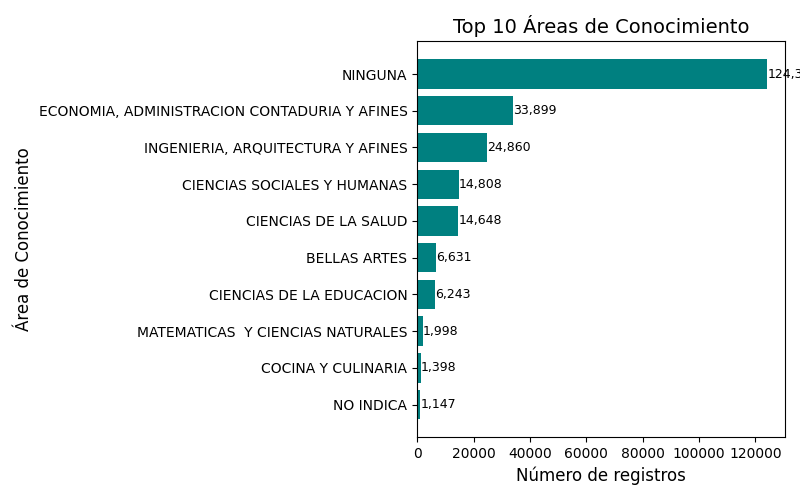

In [15]:
#==========Top 10 áreas de conocimiento con más registros

# DataFrame con las 10 áreas de conocimiento con más registros
#display(data_analisis_copia['Area Conocimiento'].value_counts().head(10).reset_index().rename(columns={'index':'Área de Conocimiento','Area Conocimiento':'Cantidad de personas'})\
#       .style.background_gradient(cmap='Blues', subset=['Cantidad de personas'])\

# Agrupación y conteo por área de conocimiento
top_areas = (data_analisis_copia.groupby("Area Conocimiento")["Cantidad de personas"].sum().nlargest(10).reset_index())

plt.figure(figsize=(8,5))
bars = plt.barh(top_areas["Area Conocimiento"], top_areas["Cantidad de personas"], color="teal")
plt.gca().invert_yaxis()

plt.title("Top 10 Áreas de Conocimiento", fontsize=14)
plt.xlabel("Número de registros", fontsize=12)
plt.ylabel("Área de Conocimiento", fontsize=12)
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():,}', va='center', fontsize=9)

plt.show()

,Area Conocimiento,Genero,Cantidad de personas,Porcentaje (%)
43,NINGUNA,MASCULINO,64589,27.56%
42,NINGUNA,FEMENINO,59738,25.49%
31,"ECONOMIA, ADMINISTRACION CONTADURIA Y AFINES",FEMENINO,21205,9.05%
36,"INGENIERIA, ARQUITECTURA Y AFINES",MASCULINO,17018,7.26%
32,"ECONOMIA, ADMINISTRACION CONTADURIA Y AFINES",MASCULINO,12692,5.42%
18,CIENCIAS DE LA SALUD,FEMENINO,11463,4.89%
24,CIENCIAS SOCIALES Y HUMANAS,FEMENINO,9976,4.26%
35,"INGENIERIA, ARQUITECTURA Y AFINES",FEMENINO,7842,3.35%
25,CIENCIAS SOCIALES Y HUMANAS,MASCULINO,4831,2.06%
15,CIENCIAS DE LA EDUCACION,FEMENINO,4584,1.96%


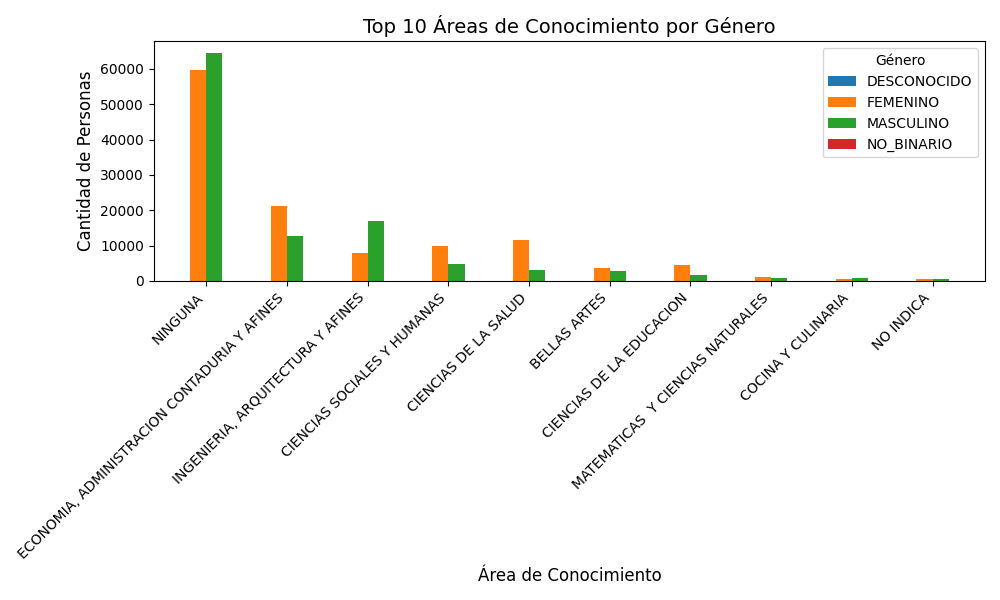

In [16]:
#======AGRUPACIÓN POR AREA DE CONOCIMIENTO Y GENERO

# Agrupación y conteo por área de conocimiento
area_conocimiento = data_analisis_copia.groupby(['Area Conocimiento','Genero'])['Cantidad de personas'].sum().reset_index().sort_values('Cantidad de personas', ascending=False)
# Mostrar tabla bonita
top_20_areasconocimiento = area_conocimiento["Cantidad de personas"].sum()
area_conocimiento["Porcentaje (%)"] = (area_conocimiento["Cantidad de personas"] / top_20_areasconocimiento * 100).round(3) #Round a 2 decimales

#top 20 áreas de conocimiento
top_20_areasconocimiento = area_conocimiento.head(20)

#Mostrar tabla con degradado de colores
display(top_20_areasconocimiento.style.format({"Porcentaje (%)": "{:.2f}%"}).background_gradient(cmap='Blues', subset=['Cantidad de personas'])\
        .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

#==========Ploteo de gráfico de barras para las 20 áreas de conocimiento con más registros
# 1) Agrupar por área de conocimiento y género
area_genero = (
    data_analisis_copia
    .groupby(["Area Conocimiento","Genero"])["Cantidad de personas"]
    .sum()
    .reset_index()
)

# 2) Pivotear: cada área tendrá columnas para MASCULINO y FEMENINO
pivot = area_genero.pivot_table(
    index="Area Conocimiento", 
    columns="Genero", 
    values="Cantidad de personas", 
    fill_value=0
)

# 3) Ordenar por total de personas y tomar Top 10
pivot["Total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("Total", ascending=False).head(10)
pivot = pivot.drop(columns="Total")

# 4) Gráfico de barras agrupadas
ax = pivot.plot(kind="bar", figsize=(10,6), width=0.8)

plt.title("Top 10 Áreas de Conocimiento por Género", fontsize=14)
plt.xlabel("Área de Conocimiento", fontsize=12)
plt.ylabel("Cantidad de Personas", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Género")
plt.tight_layout()

# 5) Tooltips dinámicos con valor + %
cursor = mplcursors.cursor(ax.containers, hover=True)

@cursor.connect("add")
def on_add(sel):
    # Índice de la fila (área de conocimiento)
    idx = sel.index
    # Género = nombre de la serie (columna en el pivot)
    genero = sel.artist.get_label()
    # Área de conocimiento
    area = pivot.index[idx]
    # Valor (conteo de personas)
    valor = sel.artist.datavalues[idx]

    # Total de personas en esa área (ambos géneros)
    total_area = pivot.loc[area].sum()
    porcentaje = (valor / total_area) * 100 if total_area > 0 else 0

    # Texto del tooltip
    sel.annotation.set_text(f"{area}\n{genero}: {valor:,} ({porcentaje:.1f}%)")
    sel.annotation.get_bbox_patch().set(fc="white", alpha=0.9)

plt.tight_layout()   # Ajusta todo automáticamente
plt.show()

,Pais,Cantidad de personas
0,ESTADOS UNIDOS,207459
1,CANADA,16160
2,AUSTRALIA,10704
3,SUDAFRICA,25


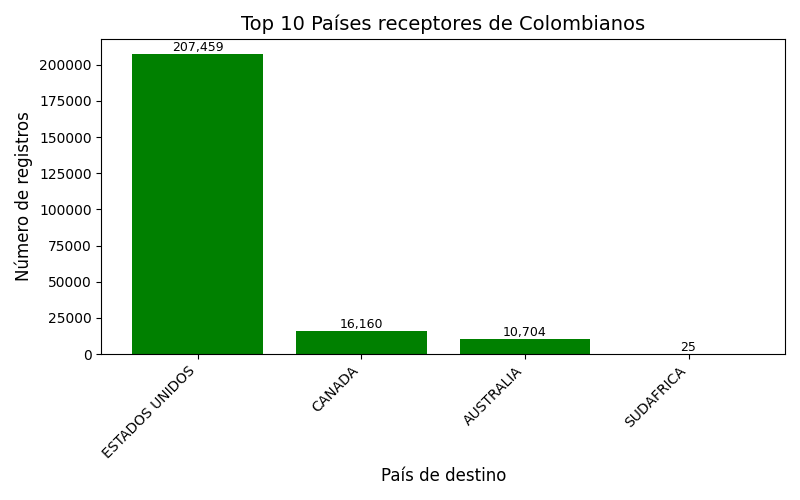

In [17]:
#========= Paises con más migrantes recibidos
# Agrupación y conteo por país de nacimiento
# Top 10 países de destino

top_paises = (data_analisis_copia.groupby("Pais")["Cantidad de personas"].sum().nlargest(10).reset_index())
#Tabla tipo df
display(top_paises.style.background_gradient(cmap='Blues', subset=['Cantidad de personas'])
        .set_properties(**{'text-align':'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))

plt.figure(figsize=(8,5))
bars = plt.bar(top_paises["Pais"], top_paises["Cantidad de personas"], color="green")

plt.title("Top 10 Países receptores de Colombianos", fontsize=14)
plt.xlabel("País de destino", fontsize=12)
plt.ylabel("Número de registros", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=9)

plt.show()

#Ploteo Grafico (Mapa conceptual de la migración y la recepción)

# ========= Agrupar datos del DataFrame =========
# Ajusta los nombres de columnas según tu DF
df_sankey = (
    data_analisis_copia.groupby(["Pais de Nacimiento", "Pais"])
    ["Cantidad de personas"]
    .sum()
    .reset_index()
)

# ========= Crear lista de nodos =========
# Nodos únicos: orígenes + destinos
nodos = list(pd.concat([df_sankey["Pais de Nacimiento"], df_sankey["Pais"]]).unique())

# Diccionario para mapear nodo → índice
mapa_indices = {pais: i for i, pais in enumerate(nodos)}

# ========= Crear enlaces (links) =========
sources = df_sankey["Pais de Nacimiento"].map(mapa_indices).tolist()
targets = df_sankey["Pais"].map(mapa_indices).tolist()
values = df_sankey["Cantidad de personas"].tolist()

# ========= Construir Sankey =========
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15, thickness=20, line=dict(color="black", width=0.5),
        label=nodos
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title="Flujos Migratorios (Origen → Destino)", title_x=0.5)
fig.show()

In [18]:
#Cargue de .geojson de Departamentos de Colombia.
ruta_geojson = r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Recopilación_Geolocalizacion/colombia-municipios.json"

with open(ruta_geojson, "r", encoding="utf-8") as f:
    colombia_geojson = json.load(f)

# ORGANIZAR GEOREFERENCIACIONES
df = data_analisis_copia
df["Coordenada X"] = pd.to_numeric(df["Coordenada X"].astype(str).str.replace(",", "."), errors="coerce")
df["Coordenada Y"] = pd.to_numeric(df["Coordenada Y"].astype(str).str.replace(",", "."), errors="coerce")
print(df[["Coordenada X", "Coordenada Y"]].dtypes)

# ================== AGRUPAR POR CIUDAD (una burbuja por ciudad)
df_grouped = df.groupby("Ciudad_Origen").agg({
    "Cantidad de personas": "sum",
    "Coordenada X": "mean",   # o "first" si quieres la primera coordenada
    "Coordenada Y": "mean"
}).reset_index()

#================heatmap para graficar mapa de calor 
# fig1 = px.density_map(df,lat="Coordenada X",lon="Coordenada Y",z="Cantidad de personas",
#                      radius=20,center=dict(lat=4.6248, lon=-74.0937),zoom=5,map_style="open-street-map"
#                      )
# fig1.update_layout(
#     title="Mapa de Calor de Migración por Coordenadas",
#     title_x=0.5
# )

# fig1.show()

# ================== MAPA DE BURBUJAS
fig = px.scatter_mapbox(
    df_grouped,
    lat="Coordenada X",
    lon="Coordenada Y",
    size="Cantidad de personas",
    color="Cantidad de personas",
    hover_name="Ciudad_Origen",
    zoom=5,
    center=dict(lat=4.6248, lon=-74.0937),
    mapbox_style="open-street-map",
    size_max=25   # Regular el tamaño máximo de las burbujas
)

fig.update_layout(title="Mapa de Migración por Ciudad", title_x=0.5)
fig.show()

Coordenada X    float64
Coordenada Y    float64
dtype: object


C:\Users\cetd9\AppData\Local\Temp\ipykernel_1464\1240075710.py:32: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
#===========Sacar muestra aleatoria de 1000 datos el ramdom_state es la semilla utilizada para la toma de datos.
muestra_aleatoria = data_analisis_copia.sample(n=1000, random_state=42)
print(muestra_aleatoria)

                  Pais Codigo ISO pais Departamento/Estado Ciudad_Migrada  \
385450  ESTADOS UNIDOS             USA      NORTH CAROLINA  WINSTON SALEM   
519878          CANADA             CAN             ONTARIO       OAKVILLE   
95172   ESTADOS UNIDOS             USA            NEW YORK     NUEVA YORK   
502360  ESTADOS UNIDOS             USA      SOUTH CAROLINA       WOODRUFF   
87985           CANADA             CAN            MANITOBA       WINNIPEG   
...                ...             ...                 ...            ...   
337102  ESTADOS UNIDOS             USA            NEW YORK         CORONA   
289209  ESTADOS UNIDOS             USA            MARYLAND      ROCKVILLE   
551155  ESTADOS UNIDOS             USA            NEW YORK  EAST ELMHURST   
596108  ESTADOS UNIDOS             USA            NEW YORK         QUEENS   
494626  ESTADOS UNIDOS             USA               TEXAS        HOUSTON   

       Oficina de registro    Grupo edad  Edades  \
385450          C. ATLA

In [ ]:
#===========Exporte de la muestra aleatoria a un archivo CSV
muestra_aleatoria.to_csv(r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/muestra_aleatoria_1000.csv", index=False, encoding='utf-8-sig')
muestra_aleatoria.to_excel(r"C:/Users/cetd9/OneDrive/MAESTRIA IA y CD/SEMESTRE 1/Proyecto_ETL_INFERENCIA_ESTADISTICA/Database/muestra_aleatoria_1000.xlsx", index=False, engine='openpyxl')